<a href="https://colab.research.google.com/github/Learningsabd/Credit_Card_Fraud_Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("/content/creditcard.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,69415.000000,69415.000000,69415.000000,69415.000000,69415.000000,69415.000000,69415.000000,69415.000000,69415.000000,69415.000000,...,69414.000000,69414.000000,69414.000000,69414.000000,69414.000000,69414.000000,69414.000000,69414.000000,69414.000000,69414.000000
mean,34519.184038,-0.244558,-0.020747,0.681822,0.168990,-0.271065,0.101799,-0.115054,0.057321,0.022473,...,-0.028673,-0.106244,-0.038245,0.005947,0.136399,0.021947,0.003072,0.003233,96.982484,0.002492
std,14370.191006,1.867033,1.655570,1.420627,1.376156,1.394497,1.308084,1.261332,1.237094,1.163167,...,0.740458,0.638843,0.609758,0.596642,0.439081,0.497691,0.381873,0.321953,271.256886,0.049861
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.000000
25%,28649.000000,-1.004689,-0.592001,0.195519,-0.724951,-0.888408,-0.636397,-0.604542,-0.141264,-0.670457,...,-0.226091,-0.526662,-0.179120,-0.325917,-0.127368,-0.328800,-0.062430,-0.005830,7.640000,0.000000
50%,37791.000000,-0.242838,0.071695,0.770956,0.187901,-0.303080,-0.150180,-0.074759,0.066544,-0.069000,...,-0.060776,-0.080608,-0.051384,0.062063,0.174489,-0.074849,0.009491,0.022774,26.470000,0.000000
75%,45254.500000,1.153743,0.727593,1.403552,1.051334,0.268315,0.494961,0.420173,0.344727,0.676925,...,0.115812,0.309536,0.079192,0.403449,0.422365,0.299444,0.082493,0.075881,88.650000,0.000000
max,53411.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


In [7]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
69410,53411,1.106584,-0.925436,0.661483,-1.664040,-1.075488,0.235442,-1.022176,0.343909,1.810465,...,0.302333,0.839735,-0.195164,-0.615158,0.279175,0.151560,0.047940,0.019442,68.02,0.0
69411,53411,-1.009202,-0.429729,2.109263,-0.718647,-0.389684,-0.038644,0.089580,0.314820,0.790871,...,-0.021664,-0.168552,0.282626,0.111297,-0.492715,0.779755,0.023864,0.133686,105.13,0.0
69412,53411,1.194319,0.184864,0.380408,0.373276,-0.018658,0.005934,-0.078417,0.062905,-0.296652,...,-0.190932,-0.524439,0.103525,-0.295192,0.180030,0.124729,-0.012819,0.003846,3.58,0.0
69413,53411,0.898915,-0.209692,0.537196,1.562960,-0.747575,-0.824138,0.249155,-0.168179,0.248011,...,-0.103293,-0.539026,-0.064167,0.697779,0.414650,-0.532499,-0.002198,0.054169,154.42,0.0
69414,53411,1.356225,-0.322399,0.450949,-0.345147,-0.784041,-0.434317,-0.485366,-0.038548,-1.212064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [9]:
df.shape

(69415, 31)

In [10]:
df['V23'].fillna(df['V23'].mean, inplace = True)
df['V24'].fillna(df['V24'].mean, inplace = True)
df['V25'].fillna(df['V25'].mean, inplace = True)
df['V26'].fillna(df['V26'].mean, inplace = True)
df['V27'].fillna(df['V27'].mean, inplace = True)
df['V28'].fillna(df['V28'].mean, inplace = True)
df['Amount'].fillna(df['Amount'].mean, inplace = True)

/tmp/ipython-input-3866102964.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.mean of 0       -0.110474
1        0.101288
2        0.909412
3       -0.190321
4       -0.137458
           ...   
69410   -0.195164
69411    0.282626
69412    0.103525
69413   -0.064167
69414         NaN
Name: V23, Length: 69415, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['V23'].fillna(df['V23'].mean, inplace = True)
/tmp/ipython-input-3866102964.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.mean of 0        0.066928
1       -0.339846
2       -0.689281
3       -1.175575
4        0.141267
           ...   
69410   -0.615158
69411    0.111297
69412   -0.295192
69413    0.697779
69414         NaN
Name: V24, Length: 69415, dtype: 

In [100]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [101]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69409,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69410,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69411,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69412,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [102]:
df = df.dropna(subset = 'Class')

In [103]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.194052,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.008983,0.014724,-0.347616,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.038424,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.097759,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,-0.099510,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69409,53410,1.293770,0.217635,-0.422879,0.120031,0.723543,0.712902,-0.126858,0.188465,-0.124066,...,-0.321600,-0.914616,-0.067427,-1.748679,0.346838,0.213696,-0.011997,-0.000288,-0.354252,0.0
69410,53411,1.106584,-0.925436,0.661483,-1.664040,-1.075488,0.235442,-1.022176,0.343909,1.810465,...,0.302333,0.839735,-0.195164,-0.615158,0.279175,0.15156,0.04794,0.019442,-0.106772,0.0
69411,53411,-1.009202,-0.429729,2.109263,-0.718647,-0.389684,-0.038644,0.089580,0.314820,0.790871,...,-0.021664,-0.168552,0.282626,0.111297,-0.492715,0.779755,0.023864,0.133686,0.030036,0.0
69412,53411,1.194319,0.184864,0.380408,0.373276,-0.018658,0.005934,-0.078417,0.062905,-0.296652,...,-0.190932,-0.524439,0.103525,-0.295192,0.18003,0.124729,-0.012819,0.003846,-0.344335,0.0


In [104]:
# Normalizing the data of all the features
from sklearn.preprocessing import StandardScaler

In [109]:
ss = StandardScaler()
df['Amount'] = ss.fit_transform(df[['Amount']])

In [110]:
# Normalized dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.194052,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.008983,0.014724,-0.347616,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.038424,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.097759,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,-0.099510,0.0


In [111]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [112]:
# Preparing the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [113]:
X_train.shape

(55531, 30)

In [114]:
X_test.shape

(13883, 30)

Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression()

In [24]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred = lr.predict(X_test)

In [26]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [116]:
# Accuracy of the LogisticRegression model
lr.score(X_test, y_test)

0.9981272059353166

In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, roc_auc_score, recall_score, classification_report

In [115]:
# Displaying the confusion matrix
confusion_matrix(y_test, y_pred)

array([[13842,     6],
       [    3,    32]])

In [30]:
accuracy_score(y_test, y_pred)

0.9981272059353166

In [31]:
precision_score(y_test, y_pred)

0.6551724137931034

In [32]:
f1_score(y_test, y_pred)

0.59375

In [33]:
recall_score(y_test, y_pred)

0.5428571428571428

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13848
         1.0       0.66      0.54      0.59        35

    accuracy                           1.00     13883
   macro avg       0.83      0.77      0.80     13883
weighted avg       1.00      1.00      1.00     13883



Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model = RandomForestClassifier(n_estimators = 200)

In [37]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [118]:
# Accuracy of the RandomForestClassifier model
model.score(X_test, y_test)

0.9992796945905064

In [39]:
y_prob = model.predict_proba(X_test)[:,1]

In [40]:
y_pred = (y_prob > 0.3).astype(int)

Logistic Regression with Balanced class

In [41]:
lr_new = LogisticRegression(class_weight = 'balanced')

In [119]:
lr_new.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [123]:
# Accuracy of the Logistics Regression model with balanced class in traininf and testing datasets
lr_new.score(X_test, y_test)

0.9657134625081034

Random Forest Classifier with Balanced class

In [44]:
new_model = RandomForestClassifier(n_estimators = 300, class_weight = 'balanced', random_state = 42)

In [122]:
# Accuracy of the Random Forest Classifier model with balanced class in training and testing datasets
new_model.score(X_test, y_test)

0.999423755672405

In [49]:
new_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [50]:
y_pred_again = new_model.predict(X_test)

In [51]:
new_model.score(X_test, y_test)

0.999423755672405

In [52]:
print(classification_report(y_test, y_pred_again))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13848
         1.0       0.94      0.83      0.88        35

    accuracy                           1.00     13883
   macro avg       0.97      0.91      0.94     13883
weighted avg       1.00      1.00      1.00     13883



SMOTE (Synthetic Minority Over-Sampling Technique)

In [42]:
from imblearn.over_sampling import SMOTE

In [125]:
# Resampling the training and testing datasets with class ditribution
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [124]:
new_model.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [136]:
new_model.score(X_test, y_test)

0.9995678167543038

In [137]:
y_pred_new = new_model.predict(X_test)

In [138]:
#Resampled data
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13848
         1.0       0.91      0.91      0.91        35

    accuracy                           1.00     13883
   macro avg       0.96      0.96      0.96     13883
weighted avg       1.00      1.00      1.00     13883



Confusion Matrix of Logistic Regression model

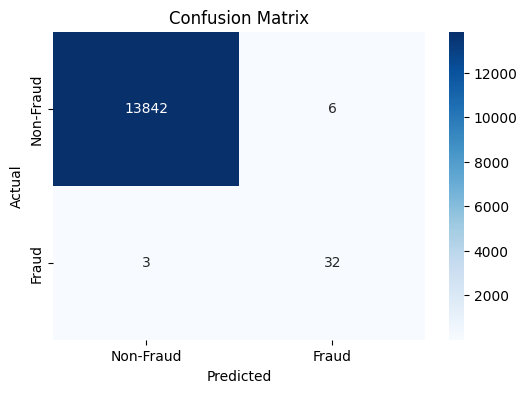

In [53]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix of Random Forest Classifier model with class dirtibution using SMOTE

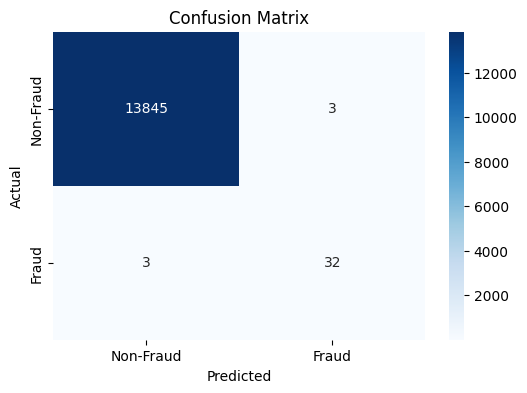

In [139]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_new)

# Plot using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix of Random Forest Classifier model with balanced class distribution

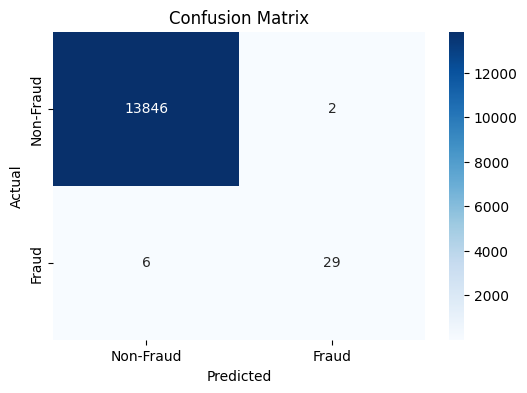

In [131]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_again)

# Plot using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [132]:
y_prob_new = new_model.predict_proba(X_test)[:,1]

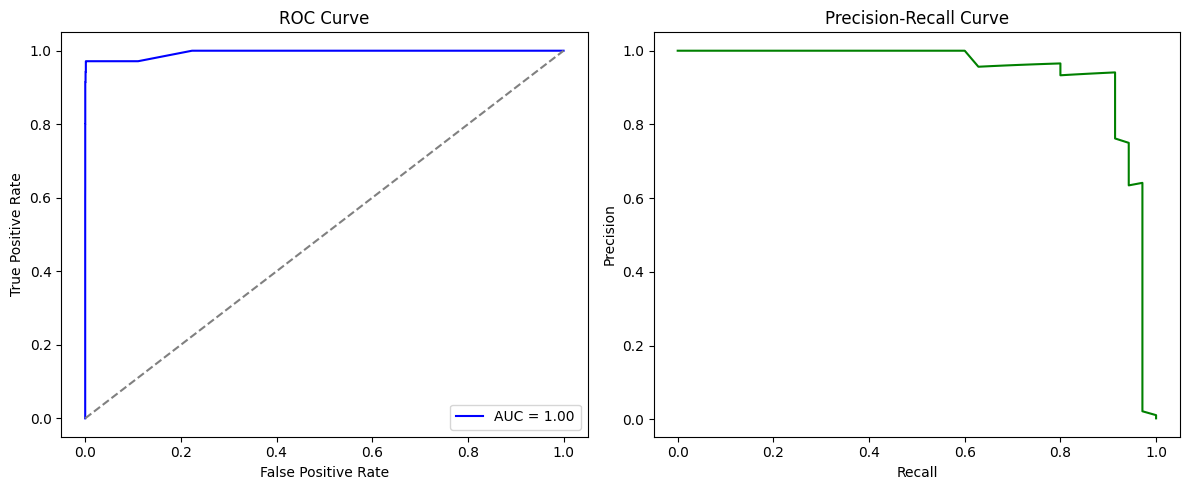

In [140]:
# Visualising the ROC and Precision-Recall Curve of Random Forest Classifier model with balanced class distribution (NOT USING SMOTE)
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_prob_new)
roc_auc = roc_auc_score(y_test, y_prob_new)

precision, recall, _ = precision_recall_curve(y_test, y_prob_new)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
axes[0].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_title('ROC Curve')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend()

# Precision-Recall Curve
axes[1].plot(recall, precision, color='green')
axes[1].set_title('Precision-Recall Curve')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')

plt.tight_layout()
plt.show()

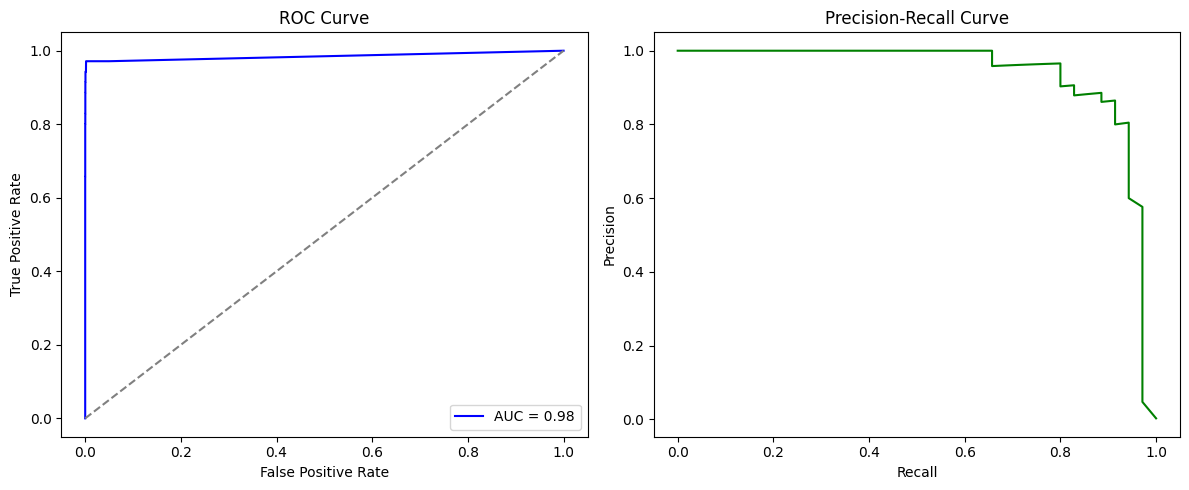

In [142]:
# Visualising the ROC and Precision-Recall Curve of Random Forest Classifier model
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

precision, recall, _ = precision_recall_curve(y_test, y_prob)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
axes[0].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_title('ROC Curve')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend()

# Precision-Recall Curve
axes[1].plot(recall, precision, color='green')
axes[1].set_title('Precision-Recall Curve')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')

plt.tight_layout()
plt.show()